# Predicting Employee Atttrition

## **Table of Contents**
A. Business Understanding 

B. Data Understanding
* Set Up & Basic Understanding
*  Report on number of features, null values, imbalance of target variable
*  Categorical Exploratory Analysis (descriptive stats, univariate & multivariate)
*  Numerical Exploratory Analysis (descriptive stats, univariate & multivariate, correlations, normality)
* Check for data entry errors, any columns to remove

C. Data Preparation 
*  Outlier handling - box plots
*  Feature Engineerring - any calculated columns
*  Feature Selection - label encoding for trees, ohe for logit
*  Scaling & encoding

D. Modeling 
*  Fit on training set - hyperparameter tuning

E. Evaluation 
* Predict & score on test set using relevant metrics 

F. Final Prediction

## **A. Business Understanding**

**Problem:**
Employee attrition is a costly event for any company,  not only does it imply lost productivity, but there are also costs involved in recruiting and training a new person. Moreover, when there is high employee turnover it can create an increasing burden on the remaining staff that are left to pick up the workload, affecting motivation and morale. 



**Solution:**
Considering that the successful growth of any organization relies on its people, it is of utmost importance to be able to mitigate the loss of personnel.

The aim of our model will be to predict whether an employee will leave the company or not (`Attrition` column, binary classification). Knowing which employees will be leaving and what personal characteristics they have can help a company plan staffing resources as well as strategize on ways to best retain certain groups of employees. 


## **B. Data Understanding**


**Set Up & Basic Understanding**

In [4]:
import pandas as pd
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

In [5]:
df = pd.read_csv("train.csv")  
df_test = pd.read_csv("test.csv")  

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1677 non-null   int64 
 1   Age                       1677 non-null   int64 
 2   BusinessTravel            1677 non-null   object
 3   DailyRate                 1677 non-null   int64 
 4   Department                1677 non-null   object
 5   DistanceFromHome          1677 non-null   int64 
 6   Education                 1677 non-null   int64 
 7   EducationField            1677 non-null   object
 8   EmployeeCount             1677 non-null   int64 
 9   EnvironmentSatisfaction   1677 non-null   int64 
 10  Gender                    1677 non-null   object
 11  HourlyRate                1677 non-null   int64 
 12  JobInvolvement            1677 non-null   int64 
 13  JobLevel                  1677 non-null   int64 
 14  JobRole                 

In [7]:
#Decriptive statistics of ordinal & numerical features
df.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,...,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
mean,838.000000,36.036971,892.749553,8.683959,2.937984,1.0,2.757901,67.798450,2.782349,1.998807,...,80.0,0.721527,10.709600,2.732856,2.769827,6.806798,4.144305,1.978533,4.186643,0.119261
std,484.252517,8.507112,374.496259,7.826143,1.039078,0.0,1.086835,19.435928,0.650664,1.083065,...,0.0,0.771259,7.255135,1.145271,0.647721,5.883282,3.583398,3.045716,3.576189,0.324192
min,0.000000,18.000000,107.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,419.000000,30.000000,589.000000,2.000000,2.000000,1.0,2.000000,51.000000,2.000000,1.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,838.000000,35.000000,890.000000,7.000000,3.000000,1.0,3.000000,69.000000,3.000000,2.000000,...,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,1257.000000,41.000000,1223.000000,12.000000,4.000000,1.0,4.000000,84.000000,3.000000,2.000000,...,80.0,1.000000,14.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000,0.000000
max,1676.000000,60.000000,3921.000000,29.000000,15.000000,1.0,4.000000,100.000000,4.000000,7.000000,...,80.0,3.000000,41.000000,6.000000,4.000000,41.000000,18.000000,15.000000,17.000000,1.000000


In [8]:
#Splitting data into 3 types of features for further data understanding
cat_feat = ['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

ord_feat = ['BusinessTravel','Education','EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction',
'PerformanceRating', 'StockOptionLevel', 'RelationshipSatisfaction', 'WorkLifeBalance']


num_feat = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate','JobLevel', 'MonthlyIncome',
            'MonthlyRate', "NumCompaniesWorked", "PercentSalaryHike", "TotalWorkingYears", 
            "TrainingTimesLastYear", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"]

In [9]:
#Exploring categorical features
df[cat_feat].describe()

,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,1677,1677,1677,1677,1677,1677
unique,3,6,2,9,3,2
top,Research & Development,Life Sciences,Male,Sales Executive,Married,No
freq,1167,775,1064,355,773,1277


In [10]:
#35 variables and 1677 observations
df.shape

(1677, 35)

**Key findings:**
* Dataset contains 1677 observations from 34 features and 1 target variable, namely:
  * 7 categorical features:
    - Department: 3 categories
    - EducationField: 6 categories
    - Gender: 2 categories
    - JobRole: 9 categories
    - MaritalStatus: 3 categories
    - Over18: all 'Y' 
    - OverTime: binary (yes/no)
  * 9 ordinal features: 
    - BusinessTravel (to be encoded): 3 point scale
    - Education: 5 point scale (1 outlier)
    - EnvironmentSatisfaction: 4 point scale
    - JobInvolvement: 4 point scale
    - JobSatisfaction: 4 point scale
    - PerformanceRating: 4 point scale (Only 3s & 4s)
    - StockOptionLevel: 0 to 3
    - RelationshipSatisfaction: 4 point scale
    - WorkLifeBalance: 4 point scale
  * 17 numerical features:
    - Age
    - DailyRate
    - DistanceFromHome
    - EmployeeCount: 1s all across => remove 
    - HourlyRate
    - Joblevel
    - MonthlyIncome
    - MonthlyRate
    - NumCompaniesWorked
    - PercentSalaryHike
    - StandardHours: 80 across all records => remove
    - TotalWorkingYears
    - TrainingTimesLastYear: 0 - 6
    - YearsAtCompany
    - YearsInCurrentRole
    - YearsSinceLastPromotion
    - YearsWithCurrManager
* There is at least one data entry outlier in the education column - as the max value is 15 but should be 5 as this variable is rated on a 5 point scale.
* Employee count, standard hours, and Over18 should be removed as all rows contain the same value.
* ID should be also removed since it does not contain relevant information for the predictions.
* Mean value of attrition is low, suggesting that target variable is probably imbalanced. This is confirmed below.
* No other noticeable errors.

## Exploratory Analysis

***NUMERICAL FEATURES: Plotting Data & Checking for normality***

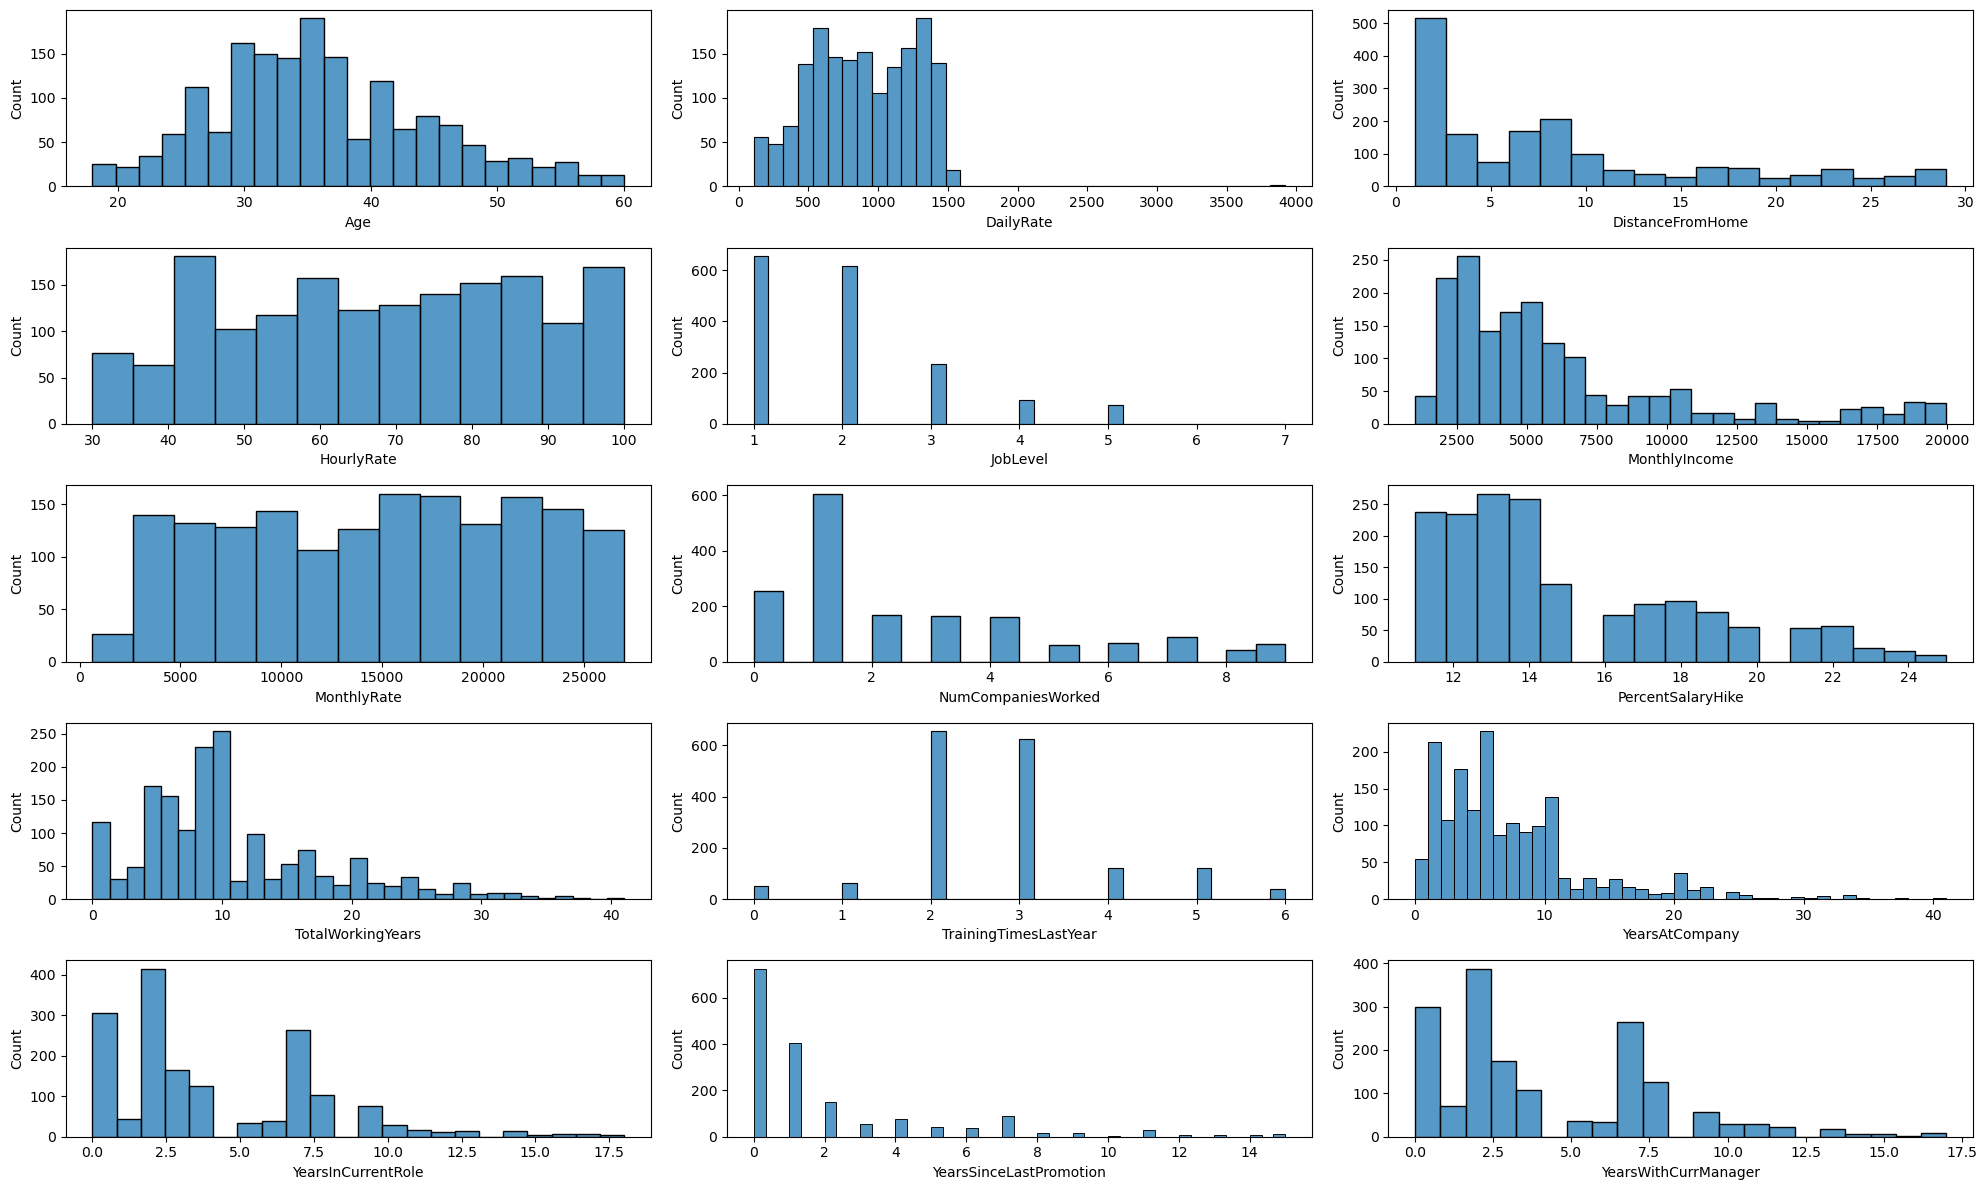

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, ax = plt.subplots(5,3, figsize=(20, 12))
for i, j in zip(num_feat, ax.flatten()):
    sns.histplot(df[i], ax=j)
fig.tight_layout()
plt.show()

**Observations:** From the histograms above we can observe that none of the numerical features are normally distributed. In fact the majority are right skewed meaning that most of the observations lie on the lower ranges. 

> *Right Skewed features: Age, YearsInCurrentRole, DistanceFromHome, MonthlyIncome, NumCompaniesWorked, PercentSalaryHike, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager.*

The distribution is important when determining which scaling method to use in the model, as some behave better under normality conditions. 

***ORDINAL FEATURES: Plotting Data & Checking for normality***

In [12]:
#Recoding BusinessTravel column as it is ordinal
df.loc[df["BusinessTravel"] == "Travel_Frequently", "BusinessTravel"] = 3
df.loc[df["BusinessTravel"] == "Travel_Rarely", "BusinessTravel"] = 2
df.loc[df["BusinessTravel"] == "Non-Travel", "BusinessTravel"] = 1

In [13]:
#Recoding BusinessTravel column as it is ordinal
df_test.loc[df_test["BusinessTravel"] == "Travel_Frequently", "BusinessTravel"] = 3
df_test.loc[df_test["BusinessTravel"] == "Travel_Rarely", "BusinessTravel"] = 2
df_test.loc[df_test["BusinessTravel"] == "Non-Travel", "BusinessTravel"] = 1

In [14]:
df['BusinessTravel'] = df['BusinessTravel'].astype(int)
df_test['BusinessTravel'] = df_test['BusinessTravel'].astype(int)

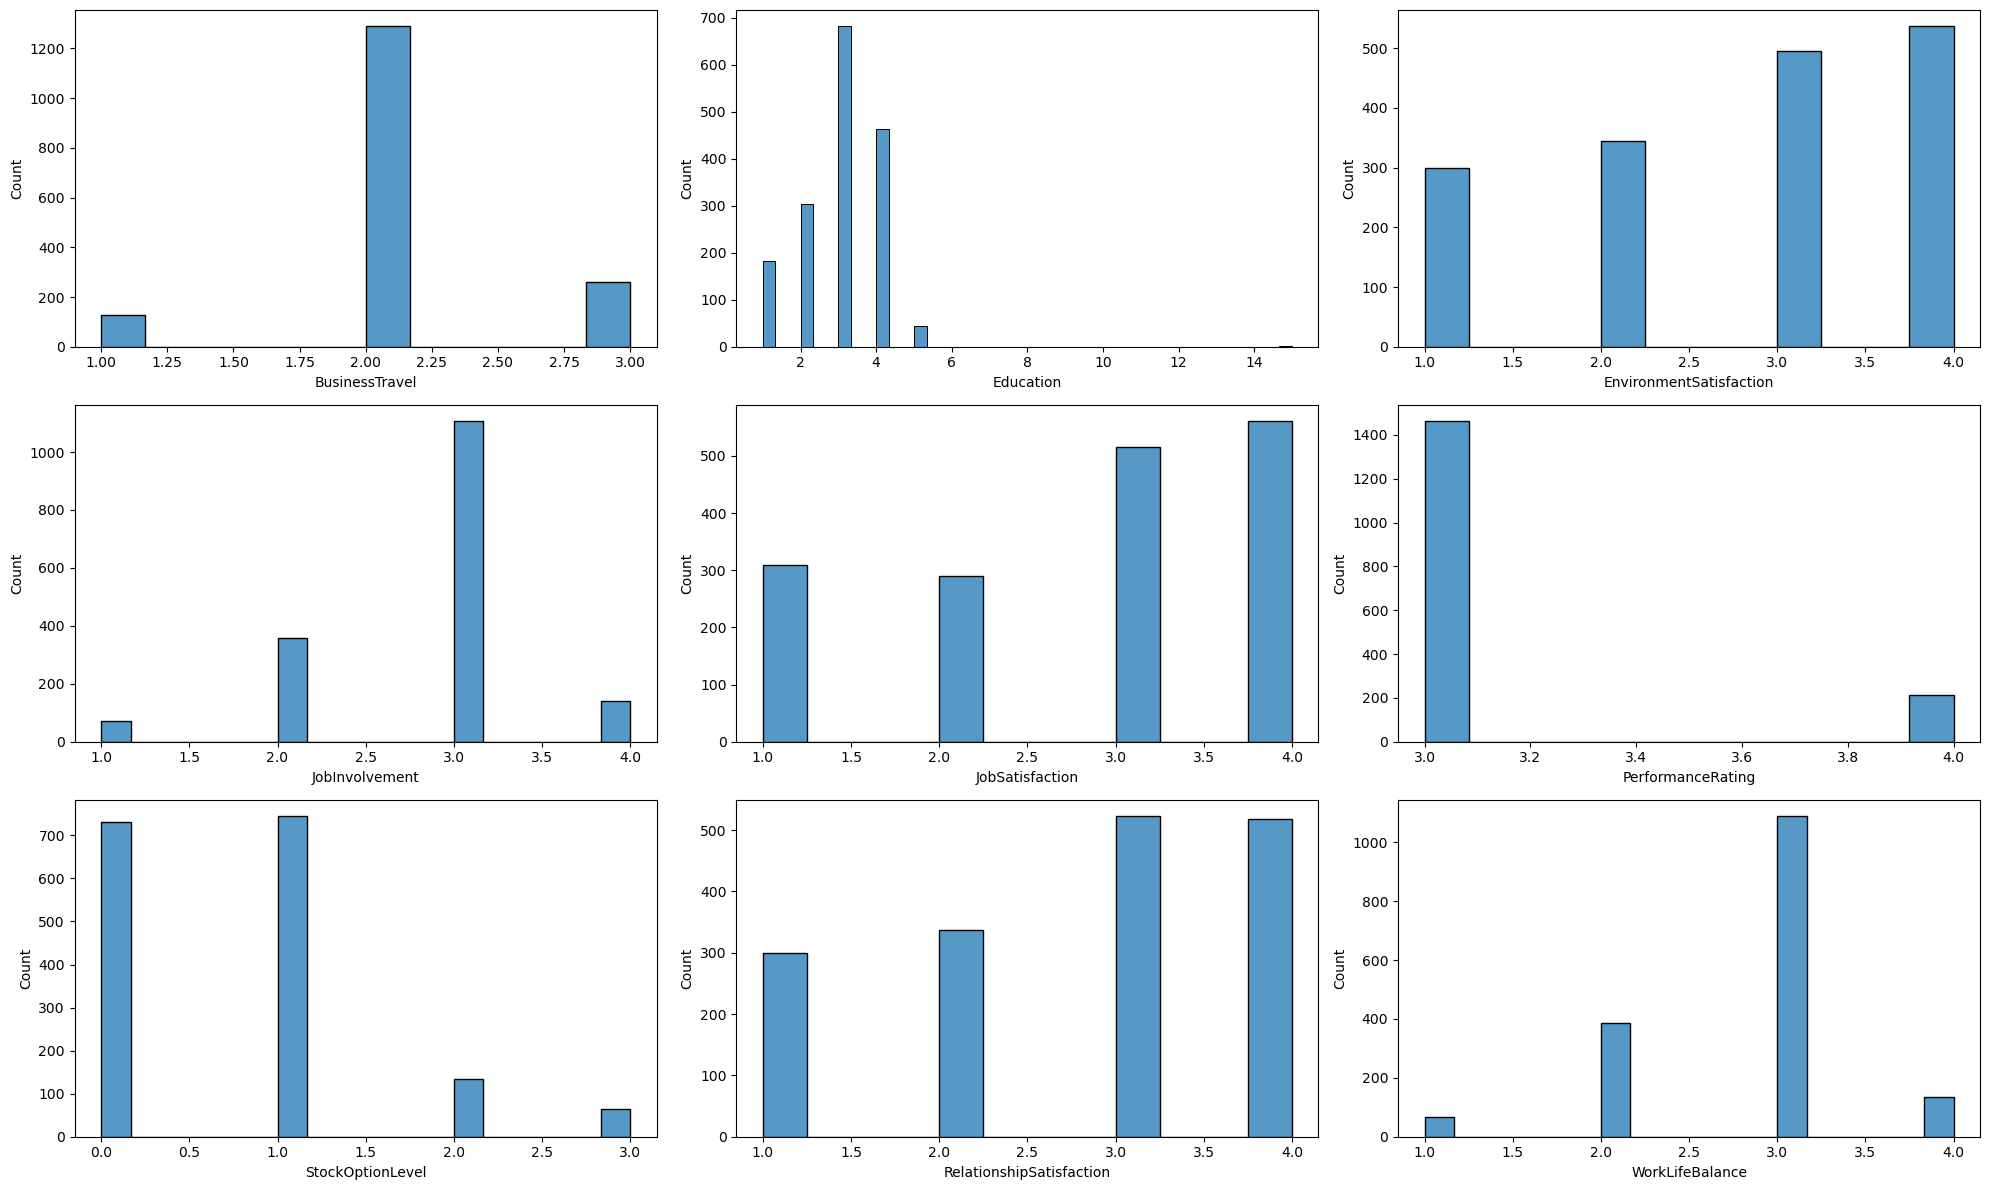

In [15]:
fig, ax = plt.subplots(3,3, figsize=(20, 12))
for i, j in zip(ord_feat, ax.flatten()):
    sns.histplot(df[i], ax=j)
fig.tight_layout()
plt.show()

**Observations:** From the histograms above we can observe that the data of certain features is higly imbalanced, which can play a role into our model results. 

For example, In *BusinessTravel*, the majority of employees 'travel rarely for work', so our model will learn more from this profile and not so much from the others. In the case of *Performance Rating*, the majority have a rating of '3.0' so perhaps this feature is not relevant in our model and should be remembered when deriving conclusions from our model. Similar considerations apply for *WorkLikeBalance*, *Job Involvement*, and *StockOptionLevel*

***CATEGORICAL FEATURES: Plotting Data & Checking for normality***

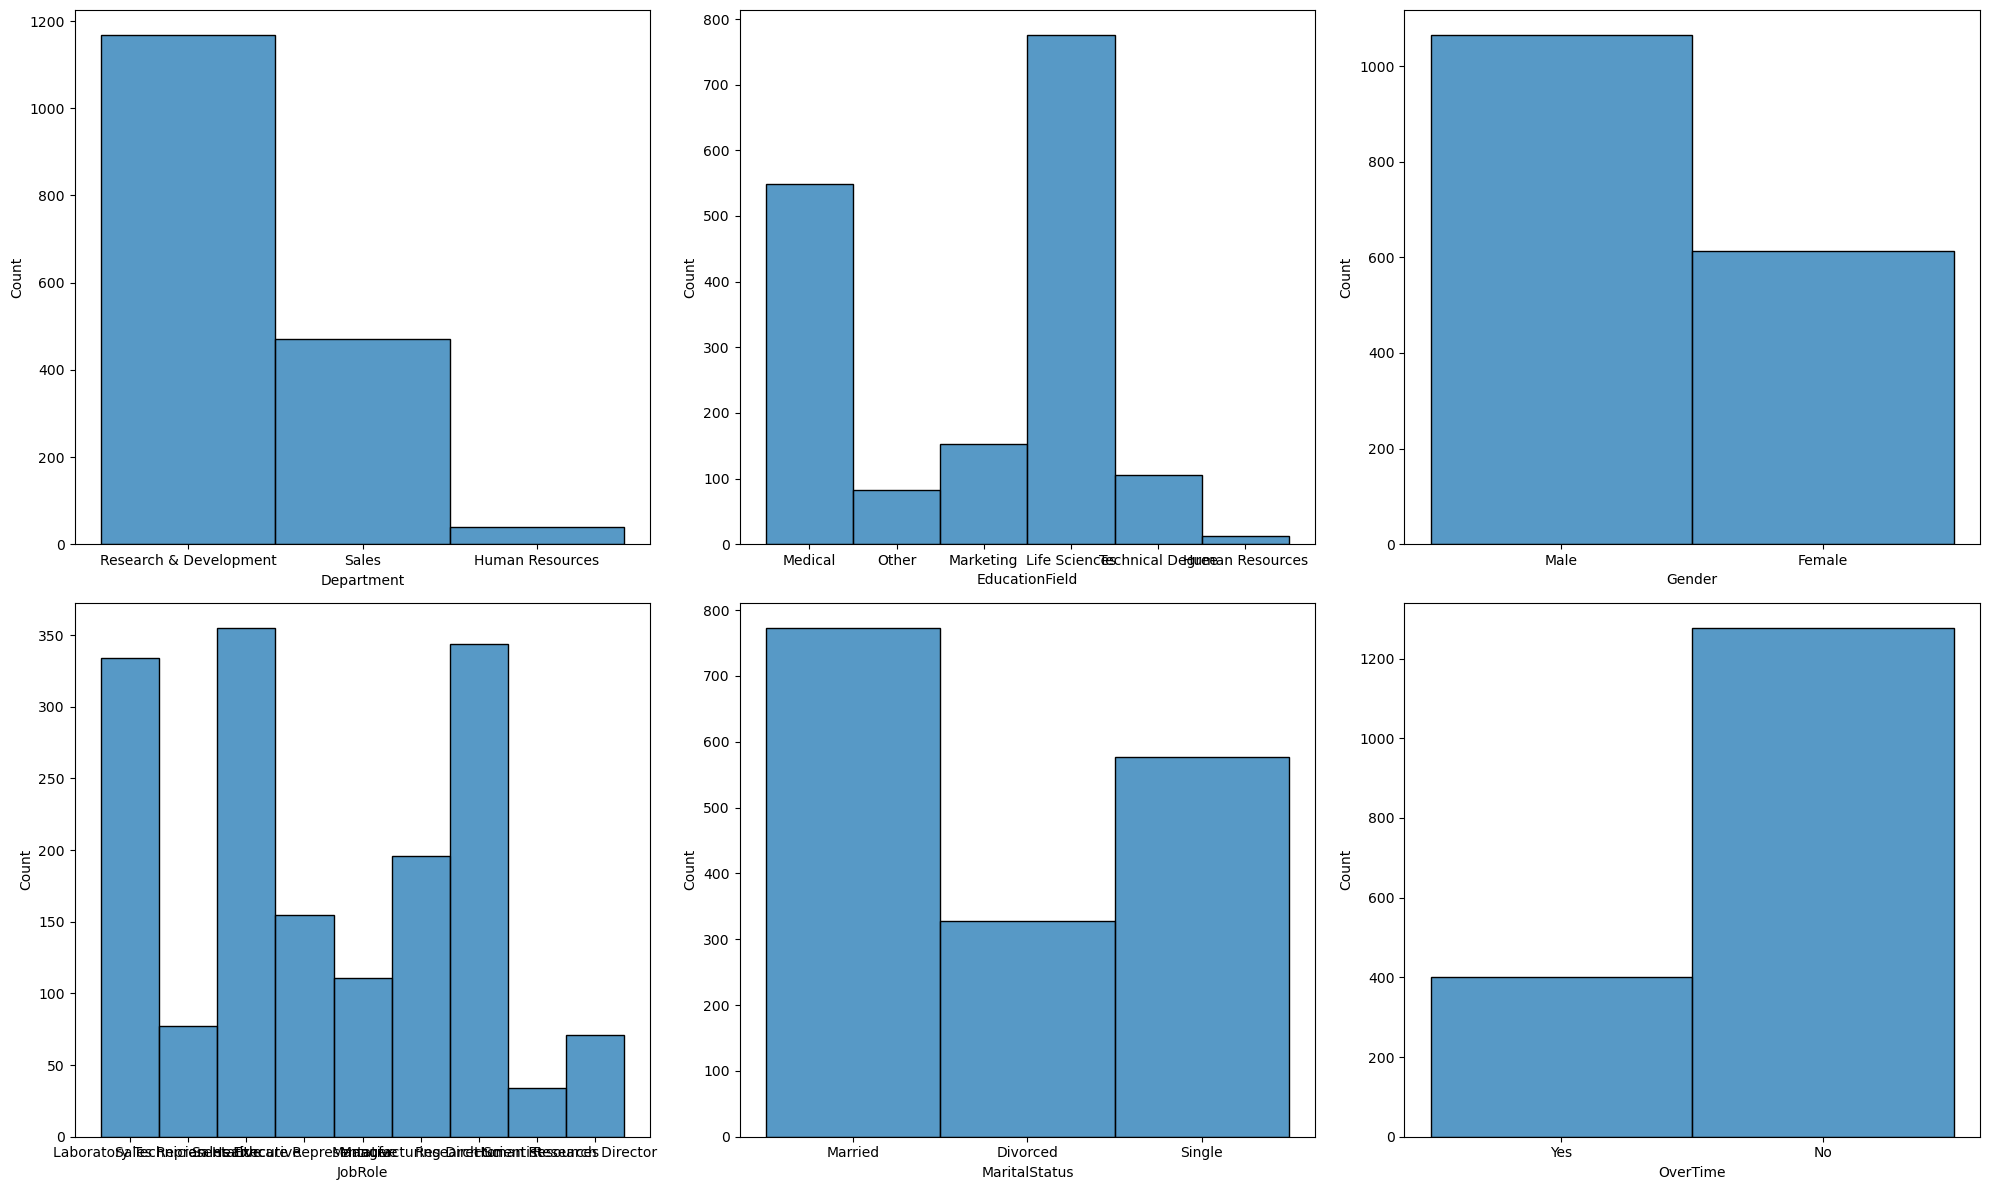

In [16]:
fig, ax = plt.subplots(2,3, figsize=(20, 12))
for i, j in zip(cat_feat, ax.flatten()):
    sns.histplot(df[i], ax=j)
fig.tight_layout()
plt.show()

**Observations:** There is imbalanced data in our dataset which could alter the results of our model.  
Large imbalances in certain features as is the case of *Overtime, Department, Medical Field* and *JobRoles*, could lead to a biased result as the model will largely learn on one specific profile of people.  

***Checking for Correlations***

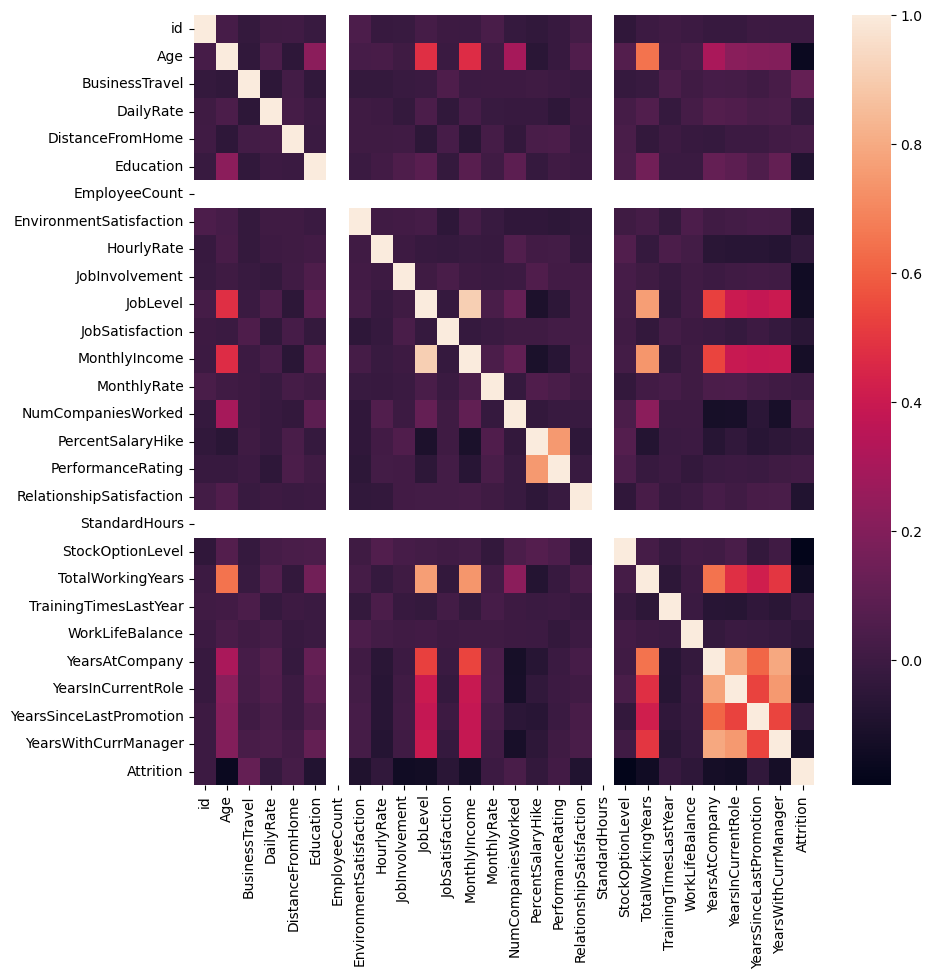

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())
plt.show()

**Observations:**
In the matrix above we can observe that the following features (see list) have high correlations (corr > 0.7). In regression specifically, features should be independent from each other to avoid altering results of the model. 

> *Features highly correlated: JobLevel with MonthlyIncome, JobLevel with TotalWorkingYears, TotalWorkingYears with MonthlyIncome, YearsAtCompany with YearsInCurrentRole, YearsAtCompany with YearsWithCurrManager, YearsinCurrentRole with YearsWithCurrManager, PercentSalaryHike with PerformanceRating*

In [18]:
df = df.drop(columns=["EmployeeCount", "StandardHours", "Over18", "id"])

In [19]:
#Splitting data into 3 types of features for further data understanding

cat_feat = ['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

ord_feat = ['BusinessTravel','Education','EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction',
    'PerformanceRating', 'StockOptionLevel', 'RelationshipSatisfaction', 'WorkLifeBalance']


num_feat = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate','JobLevel', 'MonthlyIncome',
                'MonthlyRate', "NumCompaniesWorked", "PercentSalaryHike", "TotalWorkingYears", 
                "TrainingTimesLastYear", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"]

## **C. Data Preparation**


***Outlier Detection***

In [20]:
import numpy as np 

def calculate_outlier_percentage(column):
    q1, q3 = np.percentile(column, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    outlier_percentage = round(100 * len(outliers) / len(column),2)
    return outlier_percentage

# Iterate over each numerical column in the DataFrame and calculate the outlier percentage
for column in df.select_dtypes(include=[np.number]):
    outlier_percentage = calculate_outlier_percentage(df[column])
    print(f"{column}: {outlier_percentage}% outliers")

Age: 1.31% outliers
BusinessTravel: 23.08% outliers
DailyRate: 0.06% outliers
DistanceFromHome: 3.16% outliers
Education: 0.06% outliers
EnvironmentSatisfaction: 0.0% outliers
HourlyRate: 0.0% outliers
JobInvolvement: 0.0% outliers
JobLevel: 10.14% outliers
JobSatisfaction: 0.0% outliers
MonthlyIncome: 8.29% outliers
MonthlyRate: 0.0% outliers
NumCompaniesWorked: 3.76% outliers
PercentSalaryHike: 0.6% outliers
PerformanceRating: 12.76% outliers
RelationshipSatisfaction: 0.0% outliers
StockOptionLevel: 3.88% outliers
TotalWorkingYears: 4.23% outliers
TrainingTimesLastYear: 12.58% outliers
WorkLifeBalance: 0.0% outliers
YearsAtCompany: 6.44% outliers
YearsInCurrentRole: 1.25% outliers
YearsSinceLastPromotion: 13.36% outliers
YearsWithCurrManager: 0.95% outliers
Attrition: 11.93% outliers


**Observations:** The following features have >4% of outliers in the data and as such special attention should be paid. 


> *Independent variables >4% outliers: BusinessTravel 23% ,JobLevel 10%, MonthlyIncome 8%, PerformanceRating 13% , TotalWorkingYears 4%, TrainingTimesLastYear 13%, YearsAtCompany 6%, YearsSinceLastPromotion 13%.* 

> *Dependent variable: Our target variable Attrition also has 12% outliers.*

Outliers in input data can skew and mislead the training algorithms resulting in longer training times, less accurate models and ultimately poorer results. 


No action taken as outliers could be important. Once model is fitted, consider evaluating the effect of outliers.


## Feature Engineering

In [21]:
attrition_1 = df[df['Attrition'] == 1][['Age', 'DistanceFromHome', 'YearsAtCompany','HourlyRate']]

Given the distribution of the data, we used median to calculate the new features.

In [22]:
import statistics
median_age = attrition_1['Age'].median()
median_distance = attrition_1['DistanceFromHome'].median()
median_years = attrition_1['YearsAtCompany'].median()
median_hourlyrate = attrition_1['HourlyRate'].median()

In [23]:
print(median_age)
print(median_distance)
print(median_years)
print(median_hourlyrate)

31.0
7.0
3.0
65.0


In [24]:
quartiles = attrition_1.quantile([0.25, 0.5, 0.75])

In [25]:
print(quartiles)

       Age  DistanceFromHome  YearsAtCompany  HourlyRate
0.25  28.0              2.00             1.0       50.00
0.50  31.0              7.00             3.0       65.00
0.75  37.0             13.25             7.0       82.25


In [26]:
#Feature engineering, finding factors and thresholds that affect attrition

df["MonthlyIncome/AgeRatio"] = df["MonthlyIncome"] / df['Age']
df["NumCompaniesWorked"] = df["NumCompaniesWorked"].replace(0, 1) #assumed that if currently working, then numworked is 1
df["TotalWorkingYears"]=df["TotalWorkingYears"].replace(0,1)  #assumed that if currently working, then totalworking is 1
df["AvgWorkingTime"] = df["TotalWorkingYears"] / df["NumCompaniesWorked"]

# Risk factors of employees that left 
df["AttritionAge"] = (df["Age"] < 31).astype(int)
df["AttritionDistance"] = (df["DistanceFromHome"] >= 13.25).astype(int)
df["AttritionYears"] = (df["YearsAtCompany"] < 3).astype(int)
df["AttritionHourlyRate"] = (df["HourlyRate"] < 65).astype(int)
df["UnstableEmpl"]=((df["NumCompaniesWorked"] > 2) & (df["AvgWorkingTime"] < 2.0)).astype(int)

# Applying the transformations to the test set
df_test['MonthlyIncome/AgeRatio'] = df_test['MonthlyIncome'] / df_test['Age']
df_test['NumCompaniesWorked'] = df_test['NumCompaniesWorked'].replace(0, 1)
df_test["TotalWorkingYears"]=df_test["TotalWorkingYears"].replace(0,1)
df_test["AvgWorkingTime"] = df_test["TotalWorkingYears"] / df_test["NumCompaniesWorked"]
df_test["AttritionAge"] = (df_test["Age"] < 31).astype(int)
df_test["AttritionDistance"] = (df_test["DistanceFromHome"] >= 13.25).astype(int)
df_test["AttritionYears"] = (df_test["YearsAtCompany"] < 3).astype(int)
df_test["AttritionHourlyRate"] = (df_test["HourlyRate"] < 65).astype(int)
df_test["UnstableEmpl"]=((df_test["NumCompaniesWorked"] > 2) & (df_test["AvgWorkingTime"] < 2.0)).astype(int)



In [27]:
#Overwriting the features to include the newly created features

cat_feat = ['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', "AttritionAge", "AttritionYears", "AttritionDistance", 
            "AttritionHourlyRate","UnstableEmpl"]

ord_feat = ['BusinessTravel','Education','EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction',
            'PerformanceRating', 'StockOptionLevel', 'RelationshipSatisfaction', 'WorkLifeBalance']


num_feat = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate','JobLevel', 'MonthlyIncome',
            'MonthlyRate', "NumCompaniesWorked", "PercentSalaryHike", "TotalWorkingYears", 
            "TrainingTimesLastYear", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager",
            "MonthlyIncome/AgeRatio", "AvgWorkingTime"]

****Train Test Split****

In [28]:
from sklearn.model_selection import train_test_split


#Define X and y
X = df.drop('Attrition', axis=1)
y = df['Attrition']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state= 123,
    stratify=df['Attrition'],
    test_size=0.30
)

***Scaling, encoding and applying power transformer***

In [29]:
# Scaling numerical & ordinal features, and one hot encoding categorical features 
# Change OHE to LE for random forest models
# Applying PCA to numerical features.
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import PowerTransformer #to normalize the data. important for LDA and LR models

# Create the transformers for each data type
#num_transformer = Pipeline(steps=[('num_scaler', StandardScaler())])
num_transformer = Pipeline(steps=[('power_transformer', PowerTransformer()), ('num_scaler', StandardScaler())])
ord_transformer = Pipeline(steps=[('ord_scaler', StandardScaler())])
cat_transformer = Pipeline(steps=[('encoder', OneHotEncoder())])

# Define the preprocessor, specifying which transformers to apply to each data type
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_feat),
    ('ord', ord_transformer, ord_feat),
    ('cat', cat_transformer, cat_feat)])

# Fit and transform the data using the preprocessor
X_processed = preprocessor.fit_transform(X_train)
# Transform the splitted Test X_test using the fitted scalers/encoder
X_test_processed = preprocessor.transform(X_test)
# Transform the test using the fitted scalers/encoder
df_test_processed = preprocessor.transform(df_test)

# Get the names of the columns after transformation
num_col_names = num_feat
ord_col_names = ord_feat
cat_col_names = preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(cat_feat)

# Combine the transformed data and column names into a pandas dataframe
X_train_final = pd.DataFrame(X_processed, columns=num_col_names + ord_col_names + list(cat_col_names))
X_test_final = pd.DataFrame(X_test_processed, columns=num_col_names + ord_col_names + list(cat_col_names))
test_submission = pd.DataFrame(df_test_processed, columns=num_col_names + ord_col_names + list(cat_col_names))


/Users/beatriz/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [30]:
#Removing 1 one hot encoded column for each variable
X_train_final.drop(columns=[
    "Department_Human Resources",
    "EducationField_Human Resources",
    "Gender_Female",
    "JobRole_Human Resources",
    "MaritalStatus_Divorced",
    "OverTime_Yes"], inplace=True)

X_test_final.drop(columns=[
    "Department_Human Resources",
    "EducationField_Human Resources",
    "Gender_Female",
    "JobRole_Human Resources",
    "MaritalStatus_Divorced",
    "OverTime_Yes"], inplace=True)

test_submission.drop(columns=[
    "Department_Human Resources",
    "EducationField_Human Resources",
    "Gender_Female",
    "JobRole_Human Resources",
    "MaritalStatus_Divorced",
    "OverTime_Yes"], inplace=True)

In [31]:
#Removing correlated features; important for LDA 
X_train_final.drop(columns=["JobSatisfaction",
                           "MonthlyRate",
                           "YearsInCurrentRole",
                           "YearsAtCompany",
                           "YearsWithCurrManager"], inplace=True)

#Dropping correlated columns
X_test_final.drop(columns=["JobSatisfaction",
                           "MonthlyRate",
                           "YearsInCurrentRole",
                           "YearsAtCompany",
                           "YearsWithCurrManager"],  inplace=True)

#Dropping correlated columns
test_submission.drop(columns=["JobSatisfaction",
                           "MonthlyRate",
                           "YearsInCurrentRole",
                           "YearsAtCompany",
                           "YearsWithCurrManager"], inplace=True)

**Dealing with Imbalanced Data: SMOTE**

Upon inspecting the target variable Y, we observed that it suffers from class imbalance, with the minority class (ones) accounting for only 11.9% of the total data points. We decided to use the SMOTE (Synthetic Minority Over-sampling Technique) algorithm to balance the imbalanced dataset. 

In [32]:
y_train.value_counts()

0    1033
1     140
Name: Attrition, dtype: int64

In [33]:
#data is imbalanced
140/(1033+140)

0.11935208866155157

In [36]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to oversample the data
smote = SMOTE(sampling_strategy=1, random_state=8)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_final, y_train)

In [37]:
#we can see is a one to one resample
y_train_resampled.value_counts()

0    1033
1    1033
Name: Attrition, dtype: int64

## **C. MODELING**

The model chosen was a linear discriminant analysis classifier which is a statistical model that aims to maximize the distance between classes while minimizing the distance within classes. LDA was chosen because it performed better than other models attempted.

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings("ignore")

In [39]:
# Run grid search using LDA model to find best hyperparameters
ld = LinearDiscriminantAnalysis()

param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],   
    'shrinkage': [None, 'auto',0.1, 0.5, 0.9],
    'n_components': [0.1, 0.5, 1]
}

grid_search = GridSearchCV(ld, param_grid=param_grid, cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)

print(grid_search.best_params_)

{'n_components': 0.1, 'shrinkage': None, 'solver': 'lsqr'}


In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Define the LDA model
lda = LinearDiscriminantAnalysis(n_components= 1, shrinkage= 'auto', solver= 'lsqr')

# Fit the grid search object to the data
lda.fit(X_train_resampled, y_train_resampled)

LinearDiscriminantAnalysis(n_components=1, shrinkage='auto', solver='lsqr')

## **D. EVALUATION**

The evaluation metrics used are recall, which evaluates the model's ability to correctly identify positive cases; and AUC score. 

In [41]:
# Calculate the evaluation metrics on the train set
y_pred_train = lda.predict(X_train_resampled)
precision = precision_score(y_train_resampled, y_pred_train)
recall = recall_score(y_train_resampled, y_pred_train)
f1 = f1_score(y_train_resampled, y_pred_train)
auc = roc_auc_score(y_train_resampled, y_pred_train)


print('Recall:', recall)
print('auc:', auc)


Recall: 0.8354307841239109
auc: 0.8025169409486931


In [42]:
# Calculate the evaluation metrics on the test data
y_pred_test = lda.predict(X_test_final)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
auc = roc_auc_score(y_test, y_pred_test)

print('Recall:', recall)
print('roc:', auc)

Recall: 0.7666666666666667
roc: 0.7808558558558558


The scores are similar which means that our model is not overfitting in the from the train set.

**Feature Importance**

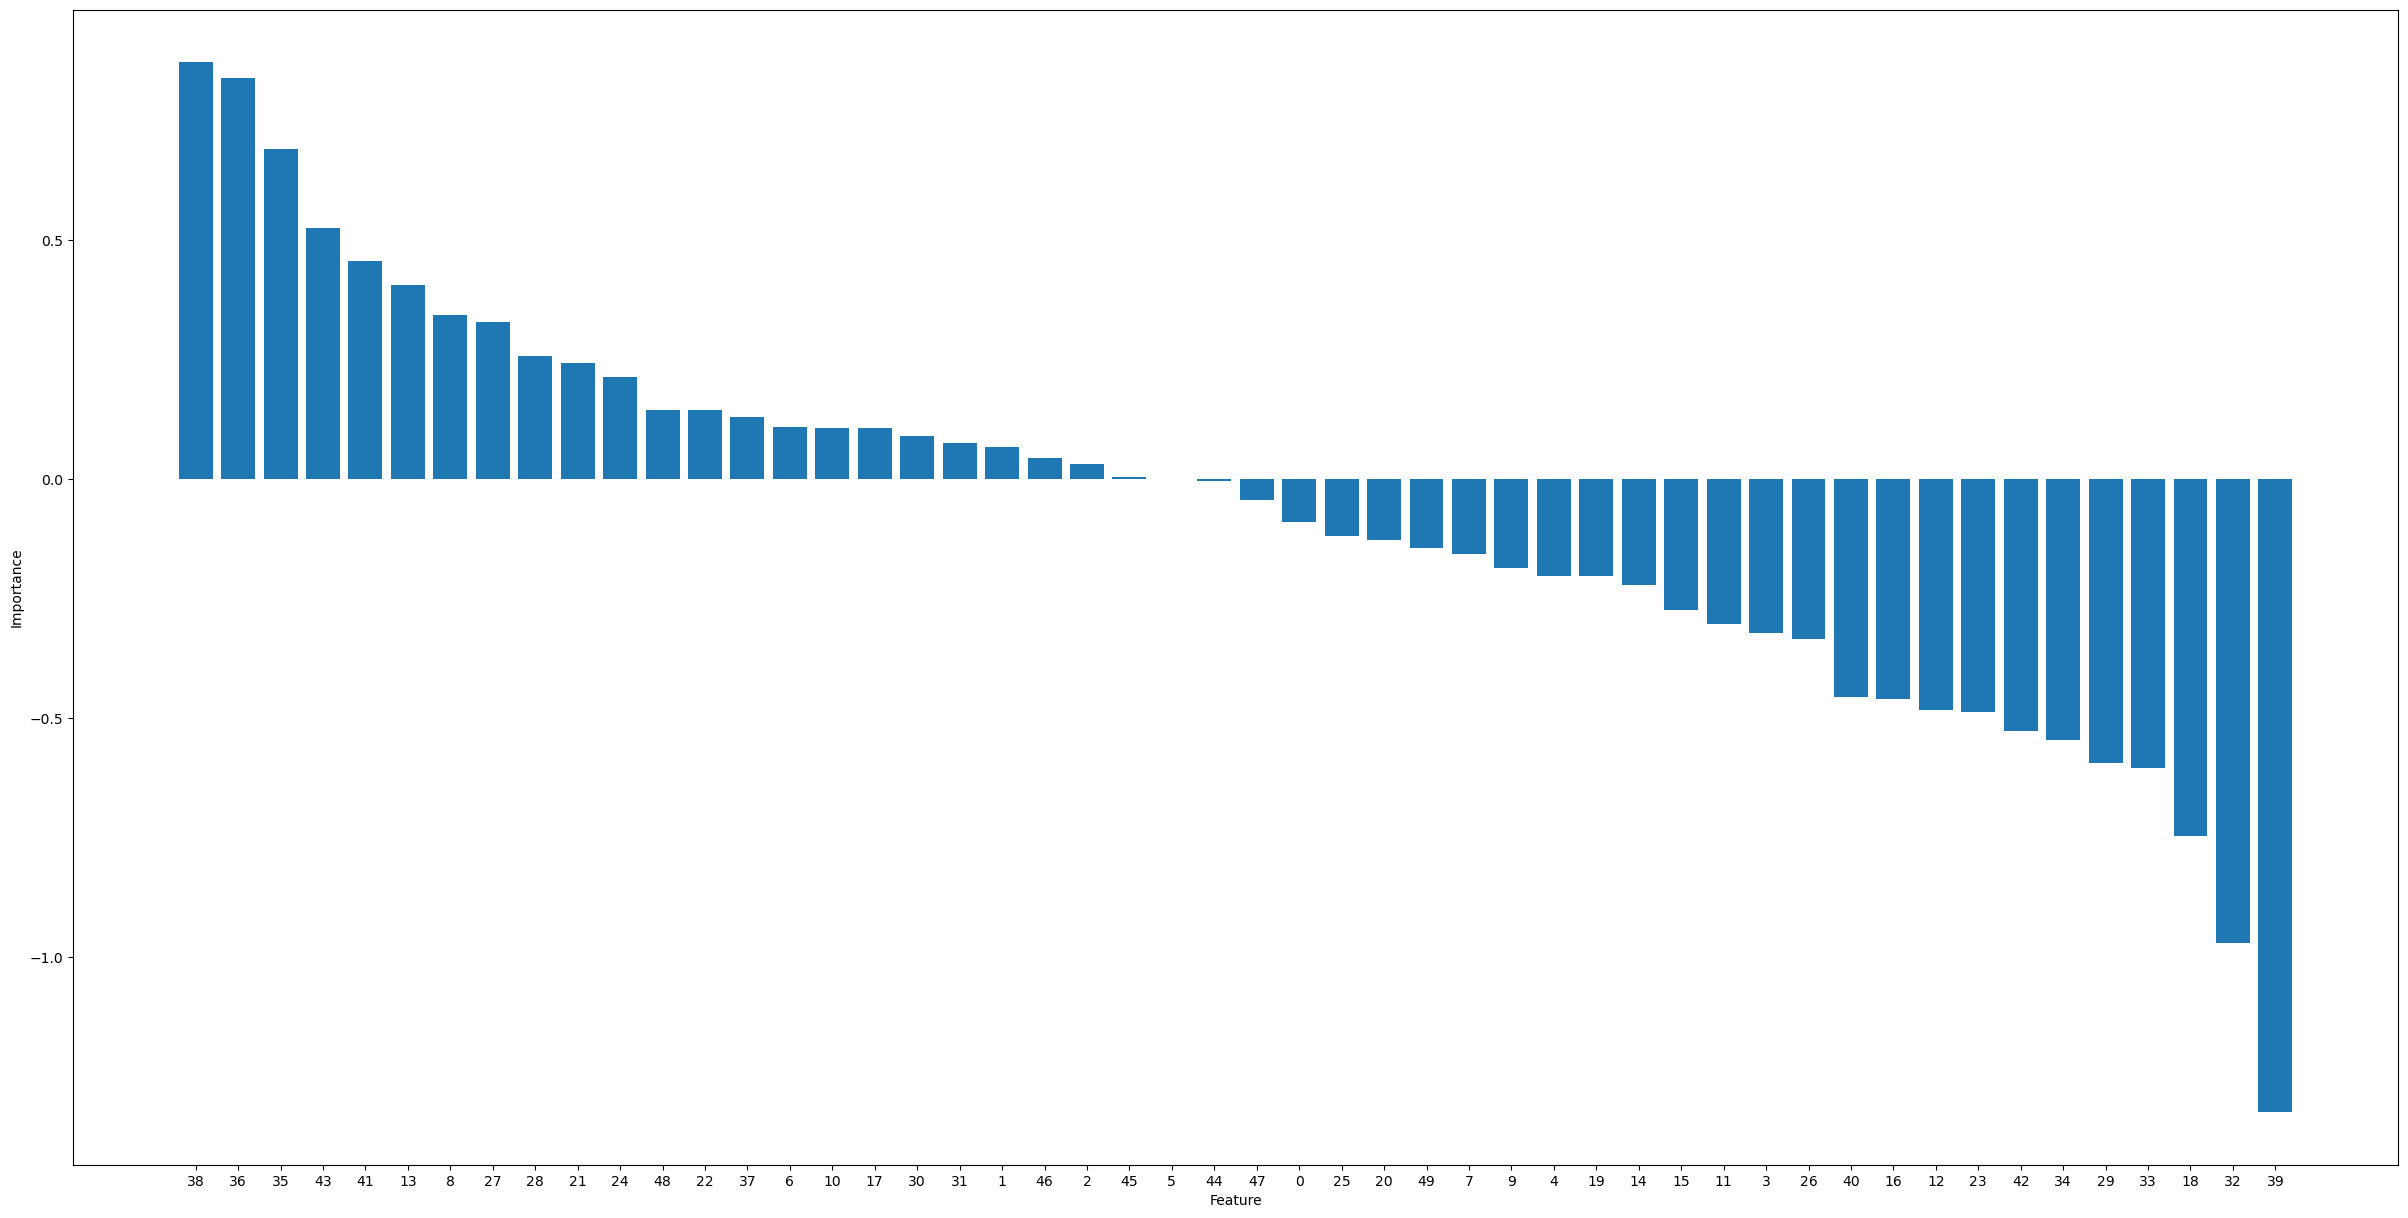

In [43]:
# Get the feature importances of the LDA model
importances = lda.coef_[0]

# Sort the feature importances in descending order
feature_names = list(X_train_resampled.columns)
sorted_indices = importances.argsort()[::-1]
sorted_importances = [(feature_names[idx], importances[idx]) for idx in sorted_indices]

# Visualize the feature importances using a bar plot
import matplotlib.pyplot as plt
plt.figure(figsize=(30,15))
plt.bar(range(X_train_resampled.shape[1]), importances[sorted_indices])
plt.xticks(range(X_train_resampled.shape[1]), sorted_indices)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

In [44]:
pd.DataFrame(sorted_importances).sort_values(by=1, ascending=False)

,0,1
0,MaritalStatus_Single,8.725885e-01
1,JobRole_Sales Representative,8.405222e-01
2,JobRole_Sales Executive,6.916516e-01
3,AttritionYears_1,5.263227e-01
4,AttritionAge_1,4.565566e-01
5,BusinessTravel,4.054592e-01
6,TotalWorkingYears,3.434120e-01
7,EducationField_Technical Degree,3.280706e-01
8,Gender_Male,2.573045e-01
9,Department_Research & Development,2.434588e-01


**Obervations:** We found that the most important features for predicting employee attrition:
* Marital_status
* JobRole_Sales Representative
* JobRole_Sales Executive
* AttritionYears_1
* AttritionAge_1

 The features that are negatively correlated with attrition are:
* OverTime_No
* JobRole_Manufacturing Director
* StockOptionLevel
* JobRole_Research Director
* JobRole_Healthcare Representative


**Confusion Matrix**

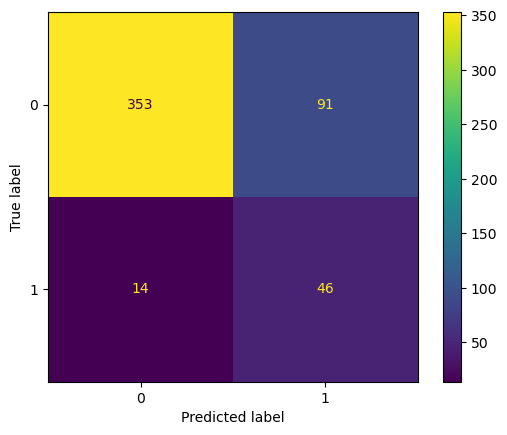

In [45]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)

## **F. Final Predictions**

Building the final table for the final predictions, which contains the ID of each employee with the predicted column.

In [46]:
y_pred_submission = lda.predict(test_submission)
final_submission = pd.DataFrame(y_pred_submission)
final_submission = final_submission.rename(columns={0: "Attrition"})
final_submission.insert(0, 'id', df_test['id'])
final_submission

,id,Attrition
0,1677,1
1,1678,1
2,1679,0
3,1680,0
4,1681,1
...,...,...
1114,2791,1
1115,2792,0
1116,2793,0
1117,2794,1
